# Data Cleaning - Colombia SABE Dataset

In [900]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [901]:
# Load Colombia SABE data
sabe_col = pd.read_stata('data_sets/SABE_col.dta')

In [902]:
# Display basic information
print(f"Dataset shape: {sabe_col.shape}")
sabe_col.info()

Dataset shape: (23694, 1081)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23694 entries, 0 to 23693
Columns: 1081 entries, id to gsi_anymax
dtypes: category(36), float32(44), float64(93), int16(21), int8(861), object(26)
memory usage: 46.9+ MB


In [903]:
for col in sabe_col.columns:
    print(col)

id
p104
p112
p113_1
p113_2
p114_1
p114_2
estrato_2
p117
regionut
pam
p121
p122edad
p122mes
p122anio
p124
p125
p126ar
p126mesa
p126per
p126rep
p126
p127r9
p127r7
p127r5
p127r3
p127r1
p127
p128tpd
p128dm
p128ps
p128
p129ar
p129mesa
p129per
p129
p130
minmenpam
p131
p132
p132a
edadproxi
generoproxi
p133_p133t2_1
p133_p133t2_2
p133_p133t2_3
p133_p133t2_4
p133
p134ar
p134mesa
p134per
p134rep
p134
p135r9
p135r7
p135r5
p135r3
p135r1
p135
p136tpd
p136dm
p136ps
p136
p137ar
p137mesa
p137per
p137
p138
minmenpro
p139_1
p139_2
p139_3
p139_4
p139_5
p139_6
p139_7
p139cual
p139a
p140
p141
p141a_1
p141a_2
p141a_3
p141a_4
p141a_5
p141a_8
p141a_9
p141b_1
p141b_2
p141b_3
p141b_4
p141b_5
p141b_6
p141b_8
p141b_9
p142
p142a
p142b
p142bcual
p201
p202
p203
p204
p205
p205si
p205cual
p206
p207
p208
p209
p226
p227
p228
p229
p229cual
p230
p230a
p231
p232
p233
p234
p235
p235cual
p236
p237_1
p237_2
p237_3
p237_4
p237_5
p237_6
p237_7
p237_8
p238
p239_1
p239_2
p239_3
p239_4
p239_5
p239_6
p239_7
p240
p241
p242_1
p242_2


In [904]:
rename_dict = {
    'p104': 'area_vivienda',
    'estrato_2': 'estrato',
    'p121': 'sexo',
    'p122edad': 'edad',
    'p124': 'estado_civil',
    'p139a': 'num_personas_hogar',
    'p140': 'afiliacion_pension',
    'p141': 'afiliacion_salud',
    'p142a': 'grupo_etnico',
    'p142b': 'raza',
    'p201': 'sabe_leer',
    'p202': 'sabe_escribir',
    'p203': 'a_educacion',
    'p204': 'nivel_educativo',
    'p209': 'vida_independiente',
    'p205': 'studying',
    'p226': 'ha_trabajado',
    'p228': 'edad_primer_trabajo',
    'p229': 'tipo_de_trabajo',
    'p235': 'rol_trabajo_actual',
    'p236': 'como_le_pagan',
    'p238': 'recibio_dinero_ultimo_mes',
    'p231': 'trabajo_actual',
    'p240': 'ingresos',
    'p241': 'num_people_depending',
    'p242_1': 'dependencia_economica',
    'p243': 'suficiencia_recursos',
    'p301': 'tipo_vivienda',
    'p302': 'posesion_vivienda',
    'p307': 'num_rooms_house',
    'p309': 'habitacion_unica',
    'p311': 'tiene_cocina',
    'p312': 'adecuacion_hogar',
    'p317': 'utiliza_computador',
    'p318': 'utiliza_internet',
    'p319': 'housing_satisfaction',
    'p327': 'fuente_agua',
    'p328': 'tipo_sanitario',
    'p329': 'energia_cocina',
    'p330': 'tipo_alumbrado',
    'p332': 'medio_transporte',
    'p333': 'uses_public_transport',
    'p401': 'religion',
    'p402': 'religion_comfort',
    'p403': 'elderly_respect',
    'p404': 'sentirse_viejo',
    'p411_1': 'beneficiario_alimentacion',
    'p411_2': 'beneficiario_col_mayor',
    'p416': 'num_times_moved',
    'p419': 'desplazado',
    'p501': 'comido_menos',
    'p502': 'comidas_al_dia',
    'p508': 'self_perceived_nutrition',
    'p509': 'consumo_alcohol',
    'p511': 'consumo_cigarrillo',
    'p516': 'sexualidad',
    'p629': 'intranquilidad',
    'p719': 'ejercicio',
    'p814': 'cancer',
    'p816': 'asma',
    'p821': 'derrame_cerebral',
    'p828': 'enfermedad_mental',
    'p830a': 'estres3_meses',
    'p832': 'sentirse_limitado',
    'p834': 'toma_medicamentos',
    'p838': 'homeopatia',
    'p839': 'tabletas_dormir',
    'p846': 'usa_gafas',
    'p853': 'problemas_auditivos',
    'p853a': 'percepcion_problemas_auditivos',
    'p861': 'necesita_protesis',
    'p874': 'caer_12_meses',
    'p879': 'miedo_caer',
    'p880': 'restringe_miedo_caer',
    'p903': 'salud_30_dias',
    'p907': 'consulta_medica',
    'p919': 'hospitalizacion',
    'p910': 'frecuencia_medico',
    'p920': 'num_veces_hospitalizado',
    'p922': 'va_al_medico',
    'p1001': 'amputacion',
    'p1005peso': 'peso',
    'p1006talla': 'talla',
    'p1207': 'fuerza_agarre',
    'cogtotal': 'minimental',
    'regionut': 'region',
    'skintone': 'color_piel',
    'minmenpam': 'minimental',
    'barthel_total': 'escala_barthel',
    'cogcat_mmse': 'categoria_cognitiva',
    'stroke': 'ataque_corazon',
    'diabetes': 'diabetes',
    'myocardial_infarction': 'infarto',
    'osteoporosis': 'osteoporosis',
    'arthrosis_arthritis_rheumatism': 'artritis',
    'arterialhypertension': 'hipertension',
    'p1015mm': 'velocidad_3metrosmins'
}

# Rename the columns
sabe_col = sabe_col.rename(columns=rename_dict)



In [905]:
# change 1 and 2 as yes, 3 no
sabe_col['afiliacion_pension'] = sabe_col['afiliacion_pension'].replace({2:1,3:0}) 

#np.nan for 98, 99 rol trabajo actual
sabe_col['rol_trabajo_actual'] = sabe_col['rol_trabajo_actual'].replace({77:np.nan, 98:np.nan,99:np.nan})

#replace 2:0 amputacion
sabe_col['amputacion'] = sabe_col['amputacion'].replace({2:0}) 
#replacement consumo alcohol
sabe_col['consumo_alcohol']= sabe_col['consumo_alcohol'].replace({9: np.nan, 8: np.nan, 0: np.nan, 98: np.nan, 5:0})

# redirect direction of miedo caer (high values, high fear)
sabe_col['miedo_caer'] = sabe_col['miedo_caer'].replace({4:1,3:2,2:3,1:4})

#afiliacion_salud
sabe_col['afiliacion_salud'] = sabe_col['afiliacion_salud'].replace ({2:1, 3:1, 4:1,5:0,8:np.nan,9:np.nan,0:np.nan})

In [906]:
# Replace values > 32 in column p307 with NaN
sabe_col.loc[sabe_col["num_rooms_house"] > 15, "p307"] = np.nan

# Change values from 2 to 0 in p312_1 through p312_6
for col in ['p312_1', 'p312_2', 'p312_3', 'p312_4', 'p312_5', 'p312_6']:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({2: 0})

# Invert values (1→0, 0→1) for p312_5 and p312_6
for col in ['p312_5', 'p312_6']:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({1: 0, 0: 1})

# Create accesibilidad_vivienda variable (sum of p312_1 to p312_6)/high values better accesibility
sabe_col['accesibilidad_vivienda'] = sabe_col[['p312_1', 'p312_2', 'p312_3', 'p312_4', 'p312_5', 'p312_6']].sum(axis=1, min_count=1)

In [907]:
# Transform values in p313_6 (1→2, 2→1)
sabe_col['p313_6'] = sabe_col['p313_6'].replace({1:2, 2: 1})

# Convert values coded as 7 to NaN in p313 columns
p313_cols = ['p313_1', 'p313_2', 'p313_3', 'p313_4', 'p313_5', 'p313_6', 'p313_7', 'p313_8', 'p313_9', 'p313_10', 'p313_11', 'p313_12']
for col in p313_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0:np.nan, 7: np.nan, 2:0, 8:np.nan, 9:np.nan})

# Create accesibilidad_hogar variable/ high values high accesibilidad
sabe_col['accesibilidad_hogar'] = sabe_col[p313_cols].sum(axis=1, min_count=1)

# Create maneja_electrodomesticos variable/high values correspond to using them more
p314_cols = ['p314_1', 'p314_2', 'p314_3', 'p314_4', 'p314_5', 'p314_6', 'p314_7', 'p314_8', 'p314_9', 'p314_10', 
             'p314_11', 'p314_12', 'p314_13', 'p314_14', 'p314_15', 'p314_16', 'p314_17', 'p314_18']
sabe_col['maneja_electrodomesticos'] = sabe_col[p314_cols].sum(axis=1, min_count=1)

In [908]:
# Transform values in p320_1 (1→3, 3→1)
sabe_col['p320_1'] = sabe_col['p320_1'].replace({1: 3, 3: 1})

# Create accesibilidad_barrio variable (high values mean high accesibilidad)
p320_cols = ['p320_1', 'p320_2', 'p320_3', 'p320_4', 'p320_5', 'p320_6', 'p320_7']
p321_cols = ['p321_1', 'p321_2', 'p321_3', 'p321_4', 'p321_5', 'p321_6', 'p321_7', 'p321_8', 'p321_9', 'p321_10']
# Replace values 8,9,7 with NaN in p321 columns
for col in p320_cols + p321_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({7: np.nan, 8: np.nan, 9: np.nan, 1:3, 3:1})

# Create accesibilidad_barrio variable/ high values mean higher risk
sabe_col['accesibilidad_barrio'] = sabe_col[p320_cols].sum(axis=1,min_count=1)
# Create seguridad_barrio variable/ high values mean higher risk
sabe_col['seguridad_barrio'] = sabe_col[p321_cols].sum(axis=1, min_count=1)

In [909]:
# Replace values 0,8,9 with NaN and 2 with 0 in p322, p323, p325
for col in ['p322', 'p323', 'p325']:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 8: np.nan, 9: np.nan, 2: 0})

# Create inseguridad_ambiental variable
inseguridad_ambiental_cols = ['p322', 'p323', 'p324_1', 'p324_2', 'p324_3', 'p324_4', 'p324_5', 'p324_8', 'p324_9', 'p325']

sabe_col['inseguridad_ambiental'] = sabe_col[inseguridad_ambiental_cols].sum(axis=1, min_count=1)

# Transform 0 to NaN and 2 to 0 in p326 columns
p326_cols = ['p326_1', 'p326_2', 'p326_3', 'p326_4']
for col in p326_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 2: 0, 9:np.nan})

# Create acceso_servicios_publicos variable/high values mean high access
sabe_col['acceso_servicios_publicos'] = sabe_col[p326_cols].sum(axis=1, min_count=1)

In [910]:
# Replace values 0,7,8,9 with NaN and 2 with 0 in p405 columns
p405_cols = ['p405_1', 'p405_2', 'p405_3', 'p405_4', 'p405_5']
for col in p405_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan, 2: 0})

# Create percepcion_tradicional_vejez variable/ higher values mean a more traditional view of aging: based on age or appearance
sabe_col['percepcion_tradicional_vejez'] = sabe_col[['p405_1', 'p405_4']].sum(axis=1, min_count=1)

# Create percepcion_funcional_vejez variable/ higher values mean a more functional view of aging: based on health, activity, or attitude
sabe_col['percepcion_funcional_vejez'] = sabe_col[['p405_2', 'p405_3', 'p405_5']].sum(axis=1, min_count=1)

# Create vejez_positiva variable/high values mean positive perception of aging
sabe_col['vejez_positiva'] = sabe_col[['p406_1', 'p406_2', 'p406_3']].sum(axis=1, min_count=1)

# Create vejez_negativa variable/ high values mean negative perception of aging
sabe_col['vejez_negativa'] = sabe_col[['p406_4', 'p406_5', 'p406_6']].sum(axis=1, min_count=1)

In [911]:
# Replace values 7,8,9 with NaN and 2 with 0 in p407a and p407b columns
p407_cols = [f'p407a_{i}' for i in range(1, 10)] + [f'p407b_{i}' for i in range(1, 10)]
for col in p407_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({7: np.nan, 8: np.nan, 9: np.nan, 2: 0})

#  Create intelectualmente_activo variable/ high values mean more active
sabe_col['intelectualmente_activo'] = sabe_col[p407_cols].sum(axis=1, min_count=1)

# Create uso_medios_tradicionales variable/higher values mean more reliance on traditional mass media
sabe_col['uso_medios_tradicionales'] = sabe_col[['p408_1', 'p408_2', 'p408_4', 'p408_5']].sum(axis=1, min_count=1)

#  Create uso_medios_digitales variable/higher values mean more reliance on digital media
sabe_col['uso_medios_digitales'] = sabe_col[['p408_6', 'p408_7']].sum(axis=1, min_count=1)

#  Create uso_redes_sociales_informales variable/ higher values mean more reliance on informal social means (friends/family)
sabe_col['uso_redes_sociales_informales'] = sabe_col[['p408_3', 'p408_8', 'p408_9']].sum(axis=1, min_count=1)

In [912]:
# Create no_esta_informado binary variable
sabe_col['no_esta_informado'] = (sabe_col['p408_10'] == 1).astype(int)

# Create participacion_religiosa variable
sabe_col['participacion_religiosa'] = sabe_col['p409_1']

# Create participacion_fisica_salud variable
sabe_col['participacion_fisica_salud'] = sabe_col[['p409_2', 'p409_9', 'p409_11']].sum(axis=1, min_count=1)

# Create participacion_cultural_comunitaria variable
sabe_col['participacion_cultural_comunitaria'] = sabe_col[['p409_4', 'p409_5', 'p409_8']].sum(axis=1, min_count=1)

# Create participacion_politica_gremial variable
sabe_col['participacion_politica_gremial'] = sabe_col[['p409_3', 'p409_7']].sum(axis=1, min_count=1)

# Create participacion_ecologica variable
sabe_col['participacion_ecologica'] = sabe_col['p409_6']

# Create participacion_personas_mayores variable
sabe_col['participacion_personas_mayores'] = sabe_col['p409_10']

# Create no_participa_grupos binary variable
sabe_col['no_participa_grupos'] = (sabe_col['p409_12'] == 1).astype(int)

In [913]:
# Create recibe_ayuda variable
p412_cols = ['p412_1', 'p412_2', 'p412_3', 'p412_4', 'p412_5', 'p412_6', 'p412_7']
sabe_col['recibe_ayuda'] = sabe_col[p412_cols].sum(axis=1, min_count=1)

# Create hace_trabajo_voluntario variable
p413_cols = ['p413_1', 'p413_2', 'p413_3', 'p413_4', 'p413_5', 'p413_6']
sabe_col['hace_trabajo_voluntario'] = sabe_col[p413_cols].sum(axis=1, min_count=1)

# Replace values 0,7,8,9 with NaN and 2 with 0 in p414 columns
p414_cols = ['p414_1', 'p414_2', 'p414_3', 'p414_4', 'p414_5', 'p414_6']
for col in p414_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan, 2: 0})

# Create nivel_apoyo_otros variable
sabe_col['nivel_apoyo_otros'] = sabe_col[p414_cols].sum(axis=1, min_count=1)

In [914]:

# Replace values 0, 77, 99 with NaN in p418
sabe_col['p418'] = sabe_col['p418'].astype(float)
sabe_col['p418'] = sabe_col['p418'].replace({0: np.nan, 77: np.nan, 99: np.nan})

# Create binary variables for p418 categories
sabe_col['salida_forzada'] = ((sabe_col['p418'] >= 1) & (sabe_col['p418'] <= 4)).astype(int)
sabe_col['salida_desastre'] = (sabe_col['p418'] == 5).astype(int)
sabe_col['salida_economica'] = ((sabe_col['p418'] == 6) | (sabe_col['p418'] == 7)).astype(int)
sabe_col['salida_servicios'] = ((sabe_col['p418'] >= 8) & (sabe_col['p418'] <= 10)).astype(int)
sabe_col['salida_familiar'] = (sabe_col['p418'] == 11).astype(int)
sabe_col['no_responde_salida'] = (sabe_col['p418'] == 98).astype(int)

In [915]:
# Replace values 0, 8 and 9 with NaN and 2 with 0 in p503, p504, p505, p506
for col in ['p503', 'p504', 'p505', 'p506']:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 8: np.nan, 9: np.nan, 2: 0}  )

# Create dieta_balanceada variable
# Calculate if all 4 diet conditions are met
all_diet_conditions = ((sabe_col['p503'] == 1) & 
                        (sabe_col['p504'] == 1) & 
                        (sabe_col['p505'] == 1) & 
                        (sabe_col['p506'] == 1))

# Calculate if at least 2 diet conditions are met
diet_conditions_count = (sabe_col['p503'] == 1).astype(int) + \
                         (sabe_col['p504'] == 1).astype(int) + \
                         (sabe_col['p505'] == 1).astype(int) + \
                         (sabe_col['p506'] == 1).astype(int)
at_least_two_conditions = diet_conditions_count >= 2

# Create dieta_balanceada based on conditions
sabe_col['dieta_balanceada'] = 0  # Default value
sabe_col.loc[at_least_two_conditions, 'dieta_balanceada'] = 1
sabe_col.loc[all_diet_conditions, 'dieta_balanceada'] = 2

In [916]:
# Replace values 0, 7, 8, 9 with NaN and 2 with 0 in p517, p518, p519
for col in ['p517', 'p518', 'p519']:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan, 2: 0})

# Create conocimiento_derechos_sexuales variable
sabe_col['conocimiento_derechos_sexuales'] = sabe_col[['p517', 'p518', 'p519']].sum(axis=1, min_count=1)

# Recode memory variables for memoria_subjetiva
# p612 recoding
sabe_col['p611'] = sabe_col['p612'].astype(float)
sabe_col['p611_recode'] = sabe_col['p612'].replace({5:1, 4: 2, 2:4, 1: 5, 8: np.nan, 9: np.nan, 0:np.nan})

# p613 recoding
sabe_col['p612'] = sabe_col['p613'].astype(float)
sabe_col['p612_recode'] = sabe_col['p613'].replace({8: np.nan, 9: np.nan, 0:np.nan})

# p614 recoding
sabe_col['p613'] = sabe_col['p614'].astype(float)
sabe_col['p613_recode'] = sabe_col['p614'].replace({1: 3, 3: 1, 8: np.nan, 9: np.nan, 0:np.nan})

# Create memoria_subjetiva by summing recoded values
sabe_col['memoria_subjetiva'] = sabe_col[['p611_recode', 'p612_recode', 'p613_recode']].sum(axis=1, min_count=1)

In [917]:
# Create depression variable
depression_cols = ['p614','p615','p616','p617','p618','p619','p620','p621','p622','p623','p624','p625']
sabe_col['test_depresion'] = sabe_col[depression_cols].sum(axis=1, min_count=1)

for col in depression_cols:
    sabe_col[col] = sabe_col[col].astype(float)
# Map depression scores to categories
def map_depression(score):
    if pd.isna(score):
        return np.nan
    elif score >= 19:
        return 3  # Depresion
    elif 10 < score < 19:
        return 2  # Depresion leve
    else:  # score <= 10
        return 1  # Sin depresion

sabe_col['tiene_depresion'] = sabe_col['test_depresion'].apply(map_depression)

In [918]:
print(sabe_col['p801'].dtype)
sabe_col['p801'].value_counts()

int8


2    8000
1    7761
0    4691
3    3143
9      54
8      45
Name: p801, dtype: int64

In [919]:
# Recode p801 and p802 values
sabe_col['p801'] = sabe_col['p801'].astype(float)
sabe_col['p801'] = sabe_col['p801'].replace({3: 1, 1: 3, 0: np.nan, 8: np.nan, 9: np.nan})
sabe_col['p802'] = sabe_col['p802'].astype(float)
sabe_col['p802'] = sabe_col['p802'].replace({3: 1, 1: 3, 0: np.nan, 8: np.nan, 9: np.nan})

# Replace values 0, 9, 8, 7 with NaN and 2 with 0 in p804, p805, p806
for col in ['p804', 'p805', 'p806']:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan, 2: 0})

# Create estres_vida_temprana variable #high values less stress
estres_cols = ['p801', 'p802', 'p804', 'p805', 'p806']
sabe_col['estres_vida_temprana'] = sabe_col[estres_cols].sum(axis=1, min_count=1)

In [920]:
sabe_col['estres_vida_temprana'].isna().sum()


4694

In [921]:
# Replace values 0, 8, 7, 9 with NaN and 2 with 0 in p803 columns
p803_cols = ['p803_1', 'p803_2', 'p803_3', 'p803_4', 'p803_5', 'p803_6', 'p803_7']
for col in p803_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan, 2: 0})

# Create enfermedad_ninez variable (high values means it was sick more frequently)
sabe_col['enfermedad_ninez'] = sabe_col[p803_cols].sum(axis=1,min_count=1)

# Replace values 9, 8, 0 with NaN in p807, p808, p809
for col in ['p807', 'p808', 'p809']:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 8: np.nan, 9: np.nan})

# Revert the scale for p807
sabe_col['p807'] = sabe_col['p807'].replace({1: 5, 2: 4, 3: 3, 4: 2, 5: 1})

# Transform values for p808 and p809
for col in ['p808', 'p809']:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({1: 3, 3: 1})

In [922]:
sabe_col['p845'].nunique()

9

In [923]:
sabe_col['p845'].value_counts()

3    8706
2    5979
0    4690
4    3333
1     553
5     400
8      12
9      12
7       9
Name: p845, dtype: int64

In [924]:
# Create autopercepcion_salud variable (high values better self perception)
sabe_col['autopercepcion_salud'] = sabe_col[['p807', 'p808', 'p809']].sum(axis=1,min_count=1)

# Replace values 7, 9, 0, 8 with NaN and 2 with 0 in p845 and p831 columns
health_cols = [f'p831_{i}' for i in range(1, 10)]
for col in health_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan, 2: 0})

# Create sintomas_ultimo_mes variable
p831_cols = [f'p831_{i}' for i in range(1, 10)]
sabe_col['sintomas_ultimo_mes'] = sabe_col[p831_cols].sum(axis=1, min_count=1)

# Transform values for p845
sabe_col['p845'] = sabe_col['p845'].astype(float)
sabe_col['p845'] = sabe_col['p845'].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan})
sabe_col['p845'] = sabe_col['p845'].replace({1: 5, 2: 4, 3: 3, 4: 2, 5: 1})
sabe_col['percepcion_visual'] = sabe_col['p845']

In [925]:
sabe_col['p845'].isna().sum()

4723

In [926]:
sabe_col['percepcion_visual'].isna().sum()

4723

In [927]:
# Replace values 9, 8, 0, 7 with NaN in oral health columns
oral_health_cols = ['p866', 'p862', 'p863', 'p864', 'p865', 'p867', 'p868', 'p869', 'p870', 'p871', 'p872', 'p873']
for col in oral_health_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan})

# Create impacto_salud_bucal variable/ higher values mean better oral health
sabe_col['impacto_salud_bucal'] = sabe_col[oral_health_cols].sum(axis=1, min_count=1)

In [928]:
# Replace values 7, 9, 0, 8 with NaN in discrimination and abuse columns
discrimination_cols = [
    'p881b_1', 'p881b_2', 'p881b_3', 'p881b_4', 
    'p882_1', 'p882_2', 'p882_3', 'p882_4',
    'p883_1', 'p883_2', 'p883_3', 'p883_4', 'p883_5', 'p883_6', 'p883_7', 
    'p883_8', 'p883_9', 'p883_10', 'p883_11'
]

for col in discrimination_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan, 3:1, 1:3})

# Create discriminacion_color_piel variable (high values = higher discrimination)
sabe_col['discriminacion_color_piel'] = sabe_col[['p881b_1', 'p881b_2', 'p881b_3', 'p881b_4']].sum(axis=1, min_count=1)

# Create trato_injusto_edad variable (high values = higher discrimination)
sabe_col['trato_injusto_edad'] = sabe_col[['p882_1', 'p882_2', 'p882_3', 'p882_4']].sum(axis=1, min_count=1)

# Create maltrato_familiar variable (high values = higher maltrato)
maltrato_cols = [
    'p883_1', 'p883_2', 'p883_3', 'p883_4', 'p883_5', 'p883_6', 'p883_7', 
    'p883_8', 'p883_9', 'p883_10', 'p883_11'
]
for col in maltrato_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan, 3:1, 1:3})
sabe_col['maltrato_familiar'] = sabe_col[maltrato_cols].sum(axis=1, min_count=1)

# Replace values 7, 9, 0, 8 with NaN and 2 with 0 in maltrato and health services columns
maltrato_vejez_cols = ['p885', 'p886', 'p887', 'p888']
servicios_salud_cols = ['p908_1', 'p908_2', 'p908_3', 'p908_4', 'p908_5', 'p908_6', 'p908_7']

for col in maltrato_vejez_cols + servicios_salud_cols:
    sabe_col[col] = sabe_col[col].astype(float)
    sabe_col[col] = sabe_col[col].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan, 2: 0})

# Create maltrato_vejez variable (high values = higher maltrato)
sabe_col['maltrato_vejez'] = sabe_col[maltrato_vejez_cols].sum(axis=1, min_count=1)

# Create uso_servicios_salud variable (high values = higher use of health services)
sabe_col['uso_servicios_salud'] = sabe_col[servicios_salud_cols].sum(axis=1, min_count=1)

# Create anthropometric measurements
sabe_col['circ_cintura'] = sabe_col['p1007cintura'] + sabe_col['p1007cintura_1']
sabe_col['circ_pantorrilla'] = sabe_col['p1008pantorrilla'] + sabe_col['p1008pantorrilla_1']
sabe_col['circ_rodilla'] = sabe_col['p1009rodilla'] + sabe_col['p1009rodilla_1']
sabe_col['circ_branquial'] = sabe_col['p1010branquial'] + sabe_col['p1010branquial_1']


# Replace 2 with 0 in independence columns
independence_cols = ['p423a', 'p424a', 'p425a', 'p426a', 'p427a']
for col in independence_cols:
    sabe_col[col] = sabe_col[col].replace({2: 0})

# Create independencia_fuera variable (high values = more independence)
sabe_col['independencia_fuera'] = sabe_col[independence_cols].sum(axis=1, min_count=1)


In [929]:
# Define the columns to keep
columns_to_keep = [
    # Derived variables
    'accesibilidad_vivienda',
    'accesibilidad_hogar',
    'maneja_electrodomesticos',
    'accesibilidad_barrio',
    'seguridad_barrio',
    'inseguridad_ambiental',
    'acceso_servicios_publicos',
    'percepcion_tradicional_vejez',
    'percepcion_funcional_vejez',
    'vejez_positiva',
    'vejez_negativa',
    'intelectualmente_activo',
    'uso_medios_tradicionales',
    'uso_medios_digitales',
    'uso_redes_sociales_informales',
    'no_esta_informado',
    'participacion_religiosa',
    'participacion_fisica_salud',
    'participacion_cultural_comunitaria',
    'participacion_politica_gremial',
    'participacion_ecologica',
    'participacion_personas_mayores',
    'no_participa_grupos',
    'recibe_ayuda',
    'hace_trabajo_voluntario',
    'nivel_apoyo_otros',
    'salida_forzada',
    'salida_desastre',
    'salida_economica',
    'salida_servicios',
    'salida_familiar',
    'no_responde_salida',
    'dieta_balanceada',
    'conocimiento_derechos_sexuales',
    'memoria_subjetiva',
    'tiene_depresion',
    'estres_vida_temprana',
    'enfermedad_ninez',
    'autopercepcion_salud',
    'sintomas_ultimo_mes',
    'percepcion_visual',
    'impacto_salud_bucal',
    'discriminacion_color_piel',
    'trato_injusto_edad',
    'maltrato_familiar',
    'maltrato_vejez',
    'uso_servicios_salud',
    'circ_cintura',
    'circ_pantorrilla',
    'circ_rodilla',
    'circ_branquial',
    'independencia_fuera',
    'colesterol_ldl',
    'trigliceridos',
    'glucosa',
    'colesterol_total',
    'hemoglobina',
    'dinamometro',
    'velocidad_3metrosmins',
    
    # Original variables (renamed)
    'area_vivienda',
    'estrato',
    'sexo',
    'edad',
    'estado_civil',
    'num_personas_hogar',
    'afiliacion_pension',
    'grupo_etnico',
    'raza',
    'sabe_leer',
    'sabe_escribir',
    'a_educacion',
    'nivel_educativo',
    'vida_independiente',
    'studying',
    'ha_trabajado',
    'edad_primer_trabajo',
    'tipo_de_trabajo',
    'rol_trabajo_actual',
    'como_le_pagan',
    'recibio_dinero_ultimo_mes',
    'trabajo_actual',
    'ingresos',
    'num_people_depending',
    'dependencia_economica',
    'suficiencia_recursos',
    'tipo_vivienda',
    'posesion_vivienda',
    'num_rooms_house',
    'habitacion_unica',
    'tiene_cocina',
    'utiliza_computador',
    'utiliza_internet',
    'housing_satisfaction',
    'fuente_agua',
    'tipo_sanitario',
    'energia_cocina',
    'tipo_alumbrado',
    'medio_transporte',
    'uses_public_transport',
    'religion',
    'religion_comfort',
    'elderly_respect',
    'sentirse_viejo',
    'beneficiario_alimentacion',
    'beneficiario_col_mayor',
    'num_times_moved',
    'desplazado',
    'comido_menos',
    'comidas_al_dia',
    'self_perceived_nutrition',
    'consumo_alcohol',
    'consumo_cigarrillo',
    'sexualidad',
    'intranquilidad',
    'ejercicio',
    'cancer',
    'asma',
    'derrame_cerebral',
    'enfermedad_mental',
    'estres3_meses',
    'sentirse_limitado',
    'toma_medicamentos',
    'homeopatia',
    'tabletas_dormir',
    'usa_gafas',
    'problemas_auditivos',
    'percepcion_problemas_auditivos',
    'necesita_protesis',
    'caer_12_meses',
    'miedo_caer',
    'restringe_miedo_caer',
    'salud_30_dias',
    'consulta_medica',
    'hospitalizacion',
    'frecuencia_medico',
    'num_veces_hospitalizado',
    'va_al_medico',
    'amputacion',
    'peso',
    'talla',
    'minimental',
    'region',
    'color_piel',
    'escala_barthel',
    'categoria_cognitiva',
    'ataque_corazon',
    'diabetes',
    'infarto',
    'osteoporosis',
    'artritis',
    'hipertension'
]

# Keep only specified columns (drop all other columns)
sabe_col = sabe_col[columns_to_keep]

# Report the dimensions of the final dataset
print(f"Final dataset shape: {sabe_col.shape}")
print(f"Number of columns kept: {len(sabe_col.columns)}")

Final dataset shape: (23694, 155)
Number of columns kept: 155


In [931]:
# Save the final cleaned dataset
sabe_col.to_csv('transformed_csv/sabe_cleaned_final.csv', index=False)
print("Final dataset saved to 'sabe_cleaned_final.csv'")

Final dataset saved to 'sabe_cleaned_final.csv'


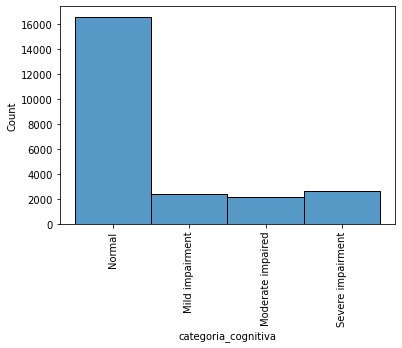

In [ ]:
sns.histplot(sabe_col['categoria_cognitiva'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
(sabe_col['escala_barthel']>600).sum()

0

In [ ]:
sabe_col['escala_barthel'].max()

100.0